In [1]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import calendar
import time
from matplotlib import colors
from sklearn import preprocessing
import cartopy.crs as crs
import cartopy.feature as cfeature
import scipy
import geopandas
import fiona

from src import format_nwp_error_df
from src import format_climate_df
from src import read_data_clim
from src import extract_index_by_year
from src import ny_plot

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
nysm_df = pd.read_csv("/home/aevans/nwp_bias/src/landtype/notebooks/nysm_coords.csv")
station_ls = nysm_df["station"].tolist()
lon_ls = nysm_df["longitude"].tolist()
lat_ls = nysm_df["latitude"].tolist()

In [4]:
index_path = "/home/aevans/nwp_bias/src/correlation/data/indexes/enso3.txt"

In [5]:
climate_df = format_climate_df.format_climate_df(index_path)

# GFS

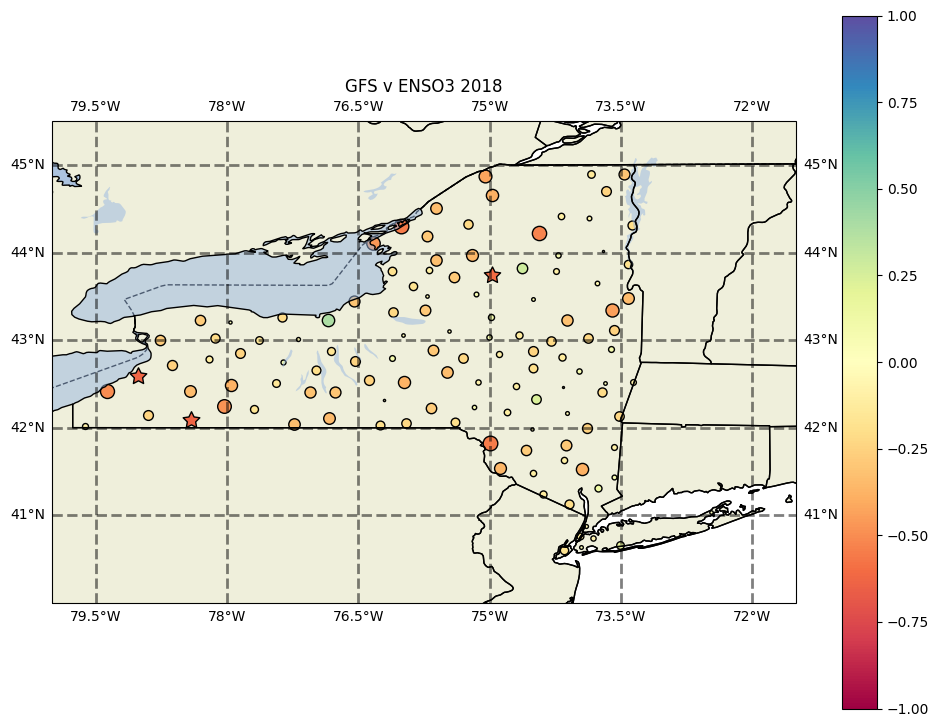

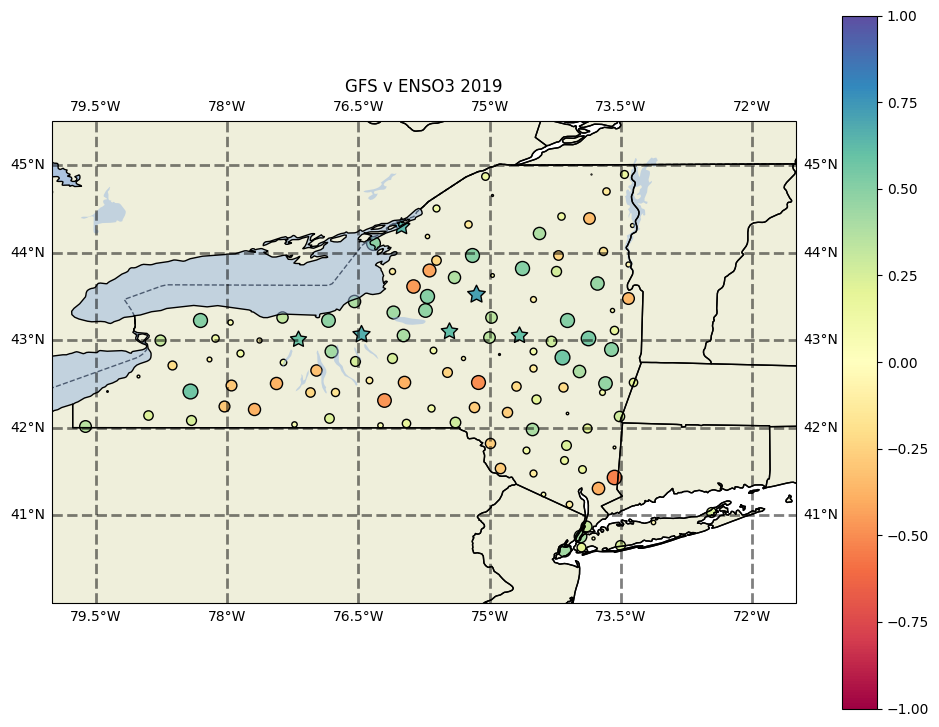

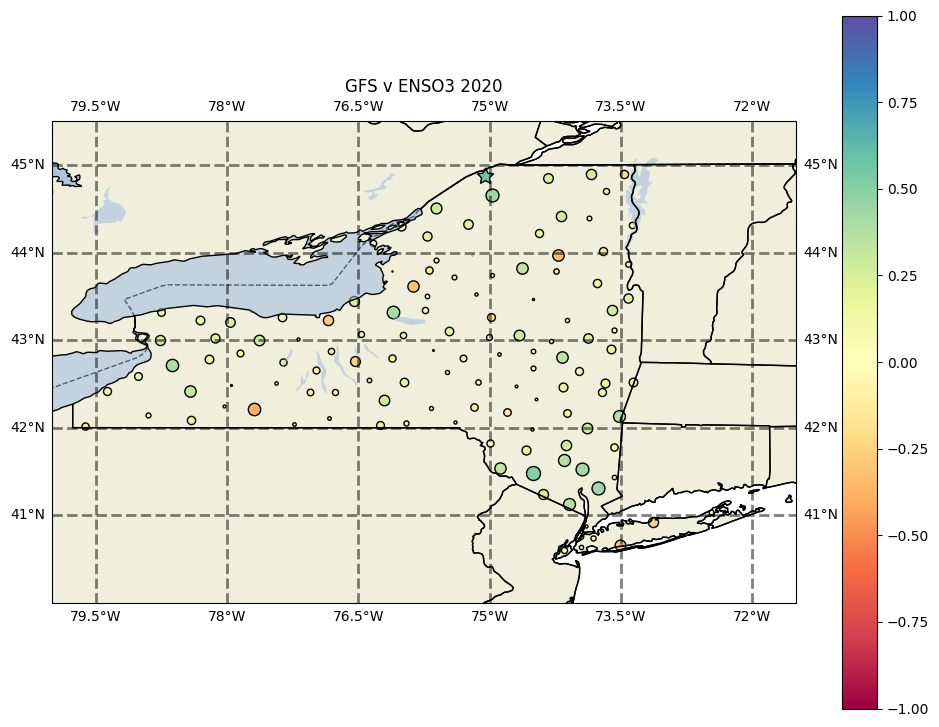

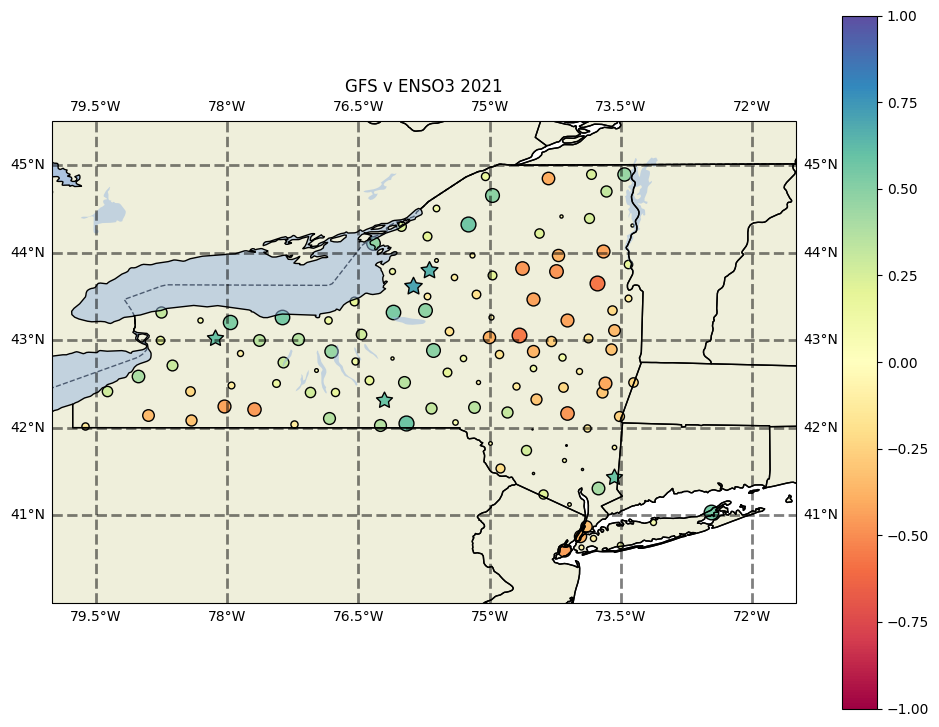

In [6]:
gfs_df = pd.DataFrame()
for year in np.arange(2018, 2022):
    init = "12"
    year = year

    (
        gfs_fcast_and_error_df,
        nam_fcast_and_error_df,
        hrrr_fcast_and_error_df,
    ) = read_data_clim.read_data(init, year)
    gfs_fcast_and_error_df = gfs_fcast_and_error_df.reset_index()
    nam_fcast_and_error_df = nam_fcast_and_error_df.reset_index()
    hrrr_fcast_and_error_df = hrrr_fcast_and_error_df.reset_index()

    pers_ls = []
    p_score_ls = []

    Y = extract_index_by_year.extract_index_by_year(year, climate_df)
    months_df = format_nwp_error_df.format_df(gfs_fcast_and_error_df, "new_tp_error")

    for station in station_ls:
        station_df = months_df[months_df["station"] == station]
        X = station_df["new_tp_error"]
        if X.shape == Y.shape:
            pers = scipy.stats.pearsonr(X, Y)[0]
            p_score = scipy.stats.pearsonr(X, Y)[1]

            pers_ls.append(pers)
            p_score_ls.append(p_score)

        else:
            pers_ls.append(-999.99)
            p_score_ls.append(-999.99)

    df1 = pd.DataFrame()
    df1["station"] = station_ls
    df1["pers"] = pers_ls
    df1["p_score"] = p_score_ls
    df1["longitude"] = lon_ls
    df1["latitude"] = lat_ls
    df1["year"] = str(year)

    gfs_df = pd.concat([df1, gfs_df])
    ny_plot.ny_plot(df1, "GFS", "ENSO3", year)

In [7]:
gfs_df["model"] = "GFS"
gfs_df

,station,pers,p_score,longitude,latitude,year,model
0,ADDI,-0.132681,0.681023,-77.237259,42.040359,2021,GFS
1,ANDE,0.312484,0.322719,-74.801392,42.182270,2021,GFS
2,BATA,0.592585,0.042310,-78.135658,43.019939,2021,GFS
3,BEAC,-0.011675,0.971275,-73.945267,41.528751,2021,GFS
4,BELD,0.312653,0.322443,-75.668518,42.223221,2021,GFS
...,...,...,...,...,...,...,...
121,WFMB,-0.055957,0.862866,-73.858826,44.393234,2018,GFS
122,WGAT,0.057372,0.859430,-75.158600,43.532410,2018,GFS
123,WHIT,-0.350500,0.264000,-73.423073,43.485073,2018,GFS
124,WOLC,0.396328,0.202148,-76.842613,43.228680,2018,GFS


# HRRR

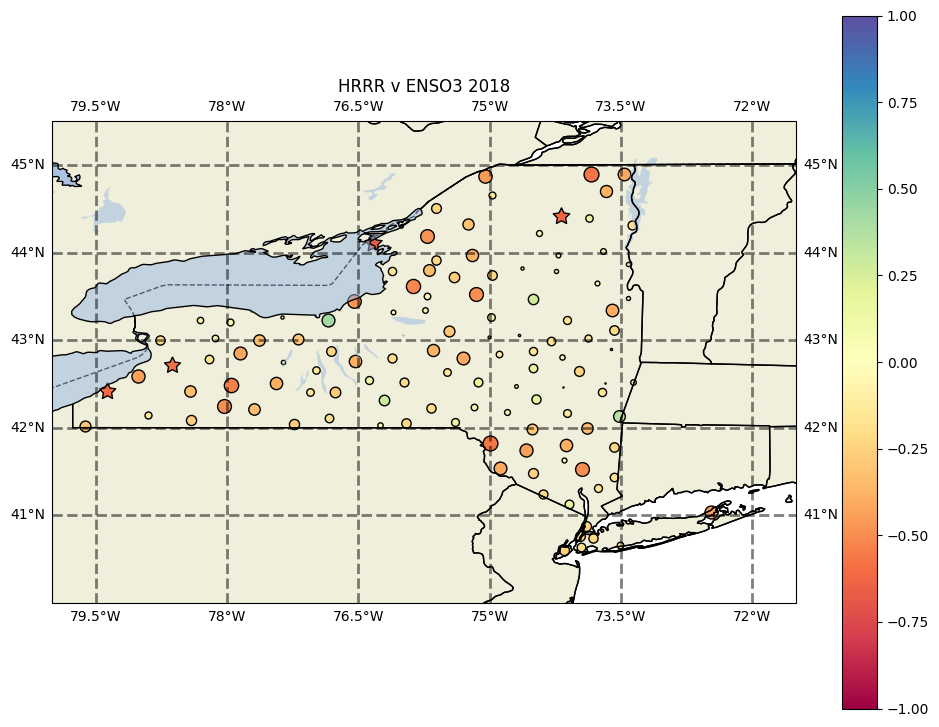

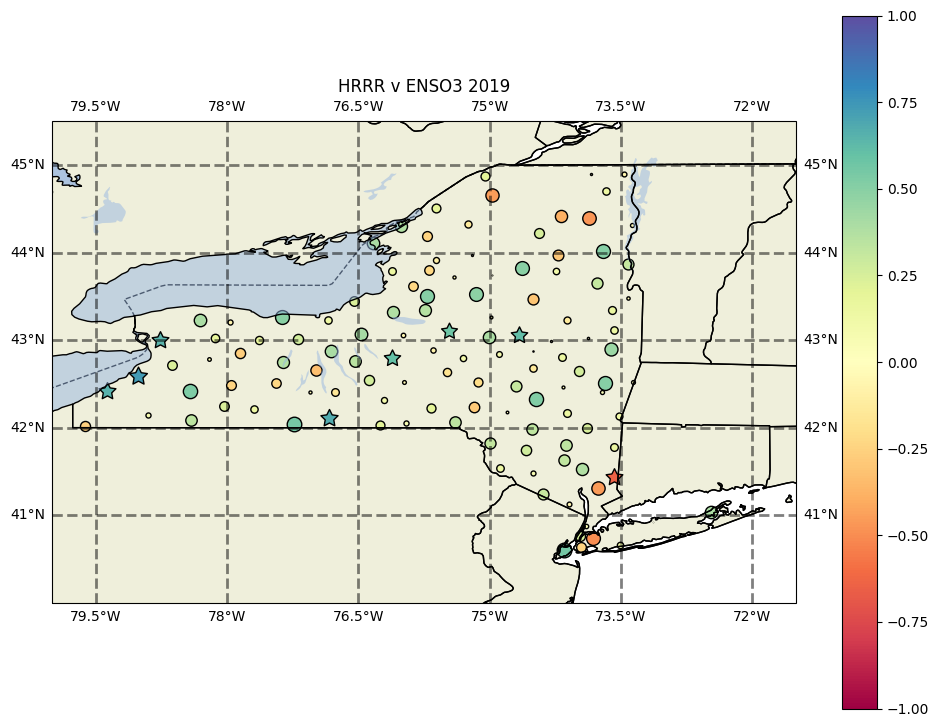

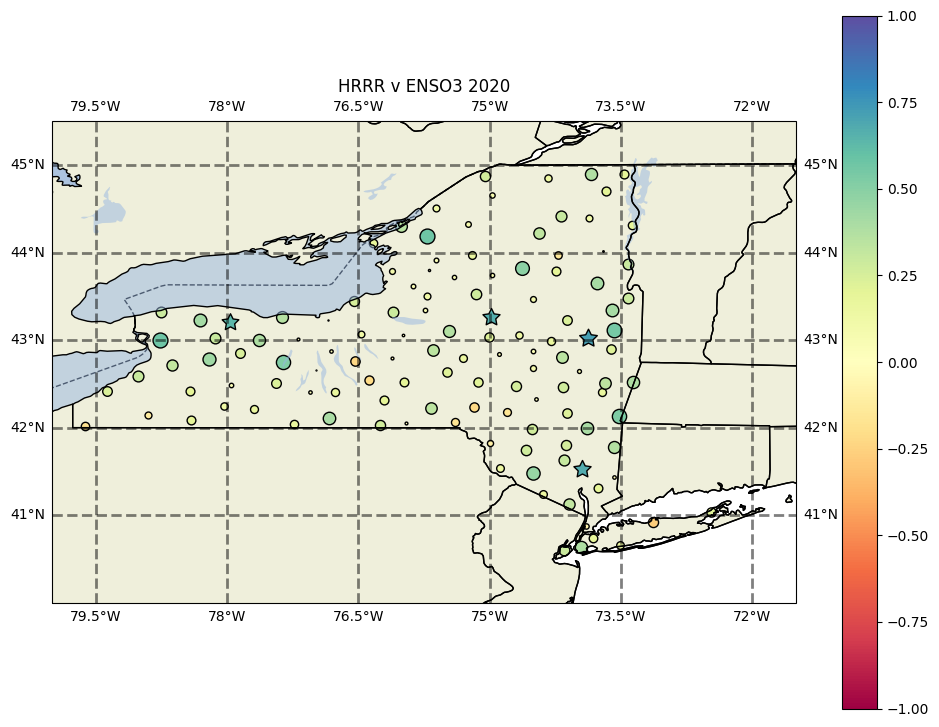

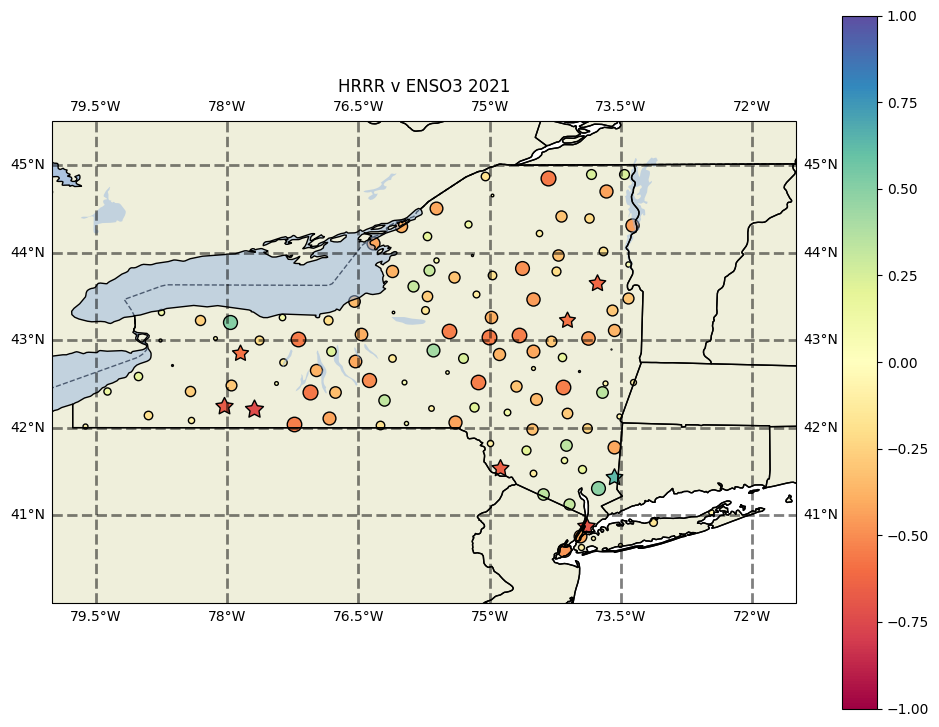

In [8]:
hrrr_df = pd.DataFrame()
for year in np.arange(2018, 2022):
    init = "12"
    year = year

    (
        gfs_fcast_and_error_df,
        nam_fcast_and_error_df,
        hrrr_fcast_and_error_df,
    ) = read_data_clim.read_data(init, year)
    gfs_fcast_and_error_df = gfs_fcast_and_error_df.reset_index()
    nam_fcast_and_error_df = nam_fcast_and_error_df.reset_index()
    hrrr_fcast_and_error_df = hrrr_fcast_and_error_df.reset_index()

    pers_ls = []
    p_score_ls = []

    Y = extract_index_by_year.extract_index_by_year(year, climate_df)
    months_df = format_nwp_error_df.format_df(hrrr_fcast_and_error_df, "new_tp_error")

    for station in station_ls:
        station_df = months_df[months_df["station"] == station]
        X = station_df["new_tp_error"]
        if X.shape == Y.shape:
            pers = scipy.stats.pearsonr(X, Y)[0]
            p_score = scipy.stats.pearsonr(X, Y)[1]

            pers_ls.append(pers)
            p_score_ls.append(p_score)

        else:
            pers_ls.append(-999.99)
            p_score_ls.append(-999.99)

    df1 = pd.DataFrame()
    df1["station"] = station_ls
    df1["pers"] = pers_ls
    df1["p_score"] = p_score_ls
    df1["longitude"] = lon_ls
    df1["latitude"] = lat_ls
    df1["year"] = str(year)

    hrrr_df = pd.concat([df1, hrrr_df])
    ny_plot.ny_plot(df1, "HRRR", "ENSO3", year)

In [9]:
hrrr_df["model"] = "HRRR"
hrrr_df

,station,pers,p_score,longitude,latitude,year,model
0,ADDI,-0.544408,0.067241,-77.237259,42.040359,2021,HRRR
1,ANDE,0.112897,0.726836,-74.801392,42.182270,2021,HRRR
2,BATA,-0.036499,0.910338,-78.135658,43.019939,2021,HRRR
3,BEAC,0.164692,0.609006,-73.945267,41.528751,2021,HRRR
4,BELD,-0.079196,0.806724,-75.668518,42.223221,2021,HRRR
...,...,...,...,...,...,...,...
121,WFMB,0.140224,0.663806,-73.858826,44.393234,2018,HRRR
122,WGAT,-0.494481,0.102215,-75.158600,43.532410,2018,HRRR
123,WHIT,-0.041667,0.897697,-73.423073,43.485073,2018,HRRR
124,WOLC,0.426410,0.166880,-76.842613,43.228680,2018,HRRR


# NAM

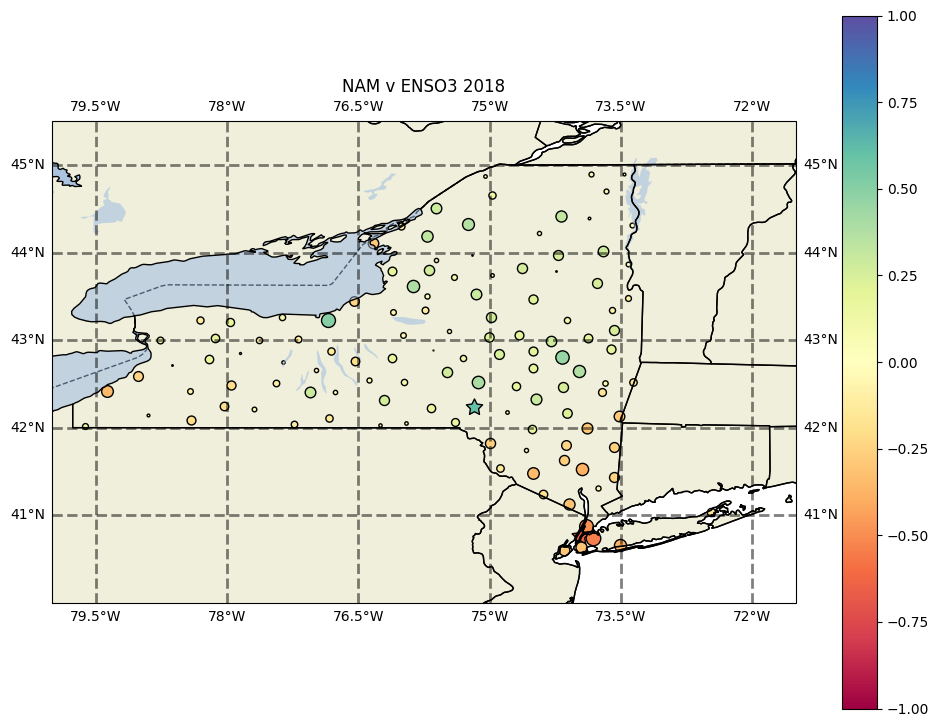

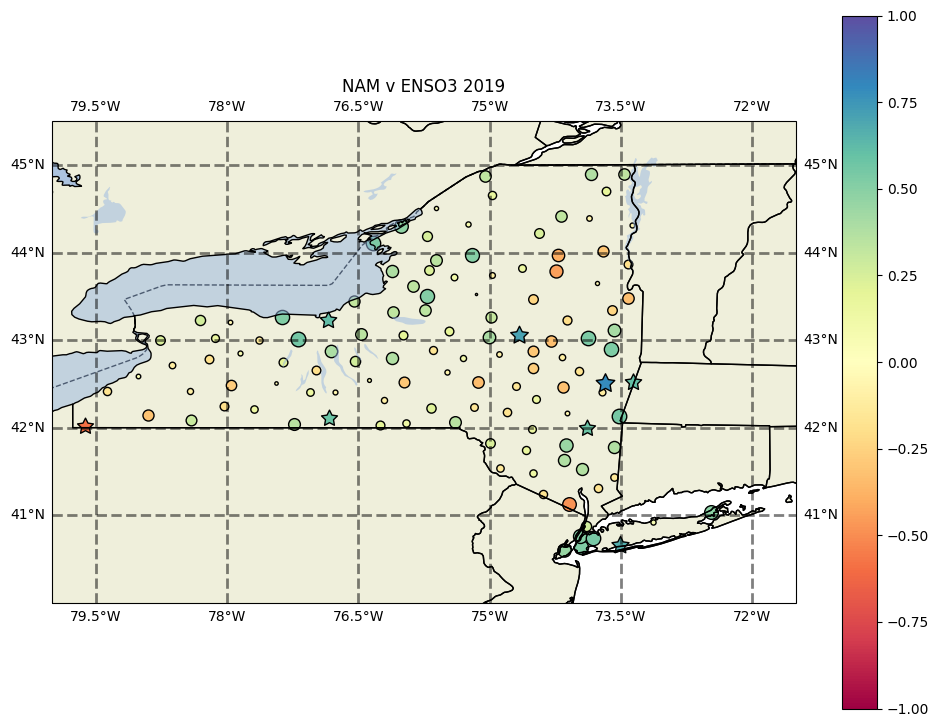

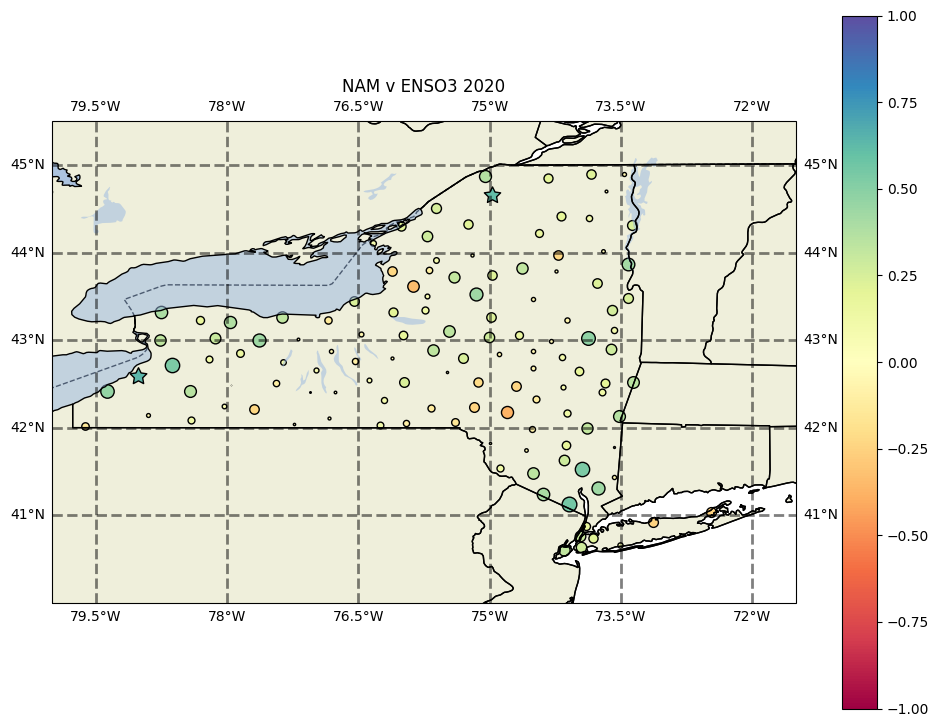

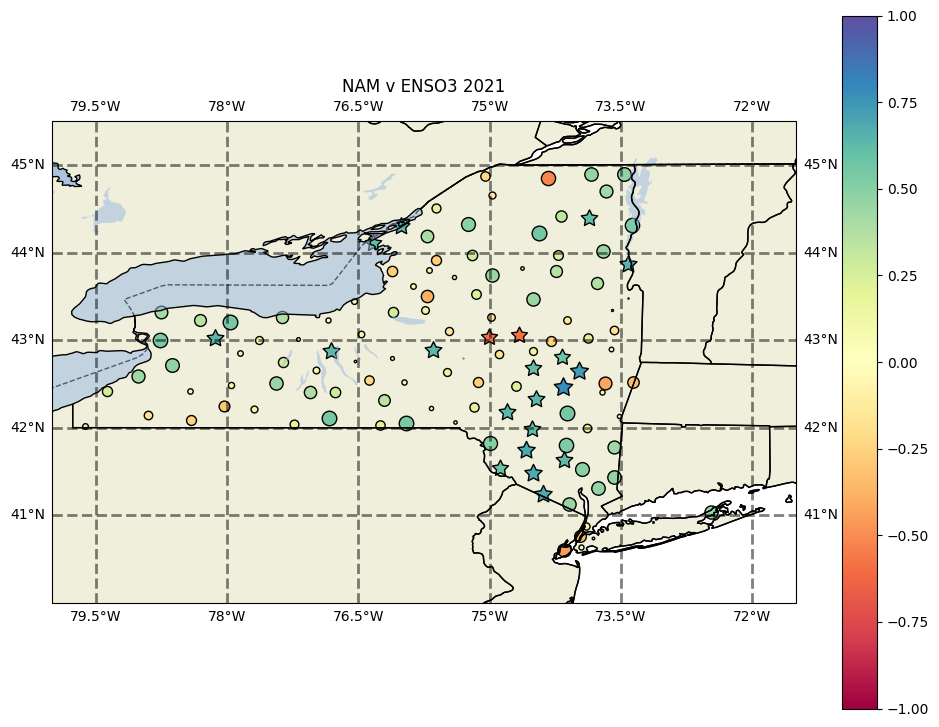

In [10]:
nam_df = pd.DataFrame()
for year in np.arange(2018, 2022):
    init = "12"
    year = year

    (
        gfs_fcast_and_error_df,
        nam_fcast_and_error_df,
        hrrr_fcast_and_error_df,
    ) = read_data_clim.read_data(init, year)
    gfs_fcast_and_error_df = gfs_fcast_and_error_df.reset_index()
    nam_fcast_and_error_df = nam_fcast_and_error_df.reset_index()
    hrrr_fcast_and_error_df = hrrr_fcast_and_error_df.reset_index()

    pers_ls = []
    p_score_ls = []

    Y = extract_index_by_year.extract_index_by_year(year, climate_df)
    months_df = format_nwp_error_df.format_df(nam_fcast_and_error_df, "new_tp_error")

    for station in station_ls:
        station_df = months_df[months_df["station"] == station]
        X = station_df["new_tp_error"]
        if X.shape == Y.shape:
            pers = scipy.stats.pearsonr(X, Y)[0]
            p_score = scipy.stats.pearsonr(X, Y)[1]

            pers_ls.append(pers)
            p_score_ls.append(p_score)

        else:
            pers_ls.append(-999.99)
            p_score_ls.append(-999.99)

    df1 = pd.DataFrame()
    df1["station"] = station_ls
    df1["pers"] = pers_ls
    df1["p_score"] = p_score_ls
    df1["longitude"] = lon_ls
    df1["latitude"] = lat_ls
    df1["year"] = str(year)

    nam_df = pd.concat([df1, nam_df])
    ny_plot.ny_plot(df1, "NAM", "ENSO3", year)

In [11]:
nam_df["model"] = "NAM"
nam_df

,station,pers,p_score,longitude,latitude,year,model
0,ADDI,0.200137,0.532848,-77.237259,42.040359,2021,NAM
1,ANDE,0.638092,0.025568,-74.801392,42.182270,2021,NAM
2,BATA,0.644042,0.023805,-78.135658,43.019939,2021,NAM
3,BEAC,0.492919,0.103473,-73.945267,41.528751,2021,NAM
4,BELD,0.045559,0.888193,-75.668518,42.223221,2021,NAM
...,...,...,...,...,...,...,...
121,WFMB,0.017892,0.955988,-73.858826,44.393234,2018,NAM
122,WGAT,0.291253,0.358370,-75.158600,43.532410,2018,NAM
123,WHIT,-0.088657,0.784091,-73.423073,43.485073,2018,NAM
124,WOLC,0.503646,0.095043,-76.842613,43.228680,2018,NAM


In [12]:
enso3_df = pd.concat([gfs_df, hrrr_df, nam_df])
# enso3_df.to_csv("/home/aevans/nwp_bias/src/correlation/data/indexes/csv/enso3.csv")

In [13]:
from src import print_stats

print_stats.print_stats(enso3_df)

The Average Correlational Coefficient Across Models is: 0.2437372217026405, and the average p-score across models is 0.5019258355884855
